<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# h1n1 model.ver1

In [4]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [5]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [6]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### Layer effect

**layer 3개**

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_s = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_s = model_h1n1_ver1_s.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 7ms/step - loss: 0.8170 - accuracy: 0.4832 - val_loss: 0.5929 - val_accuracy: 0.7755
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7849 - val_loss: 0.5188 - val_accuracy: 0.7861
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7874 - val_loss: 0.4927 - val_accuracy: 0.7908
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7918 - val_loss: 0.4804 - val_accuracy: 0.7944
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7966 - val_loss: 0.4742 - val_accuracy: 0.7980
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.8007 - val_loss: 0.4686 - val_accuracy: 0.8012
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.8029 - val_loss: 0.4662 - val_accuracy: 0.8012
Epoch 8/20
39/39 [==

**layer 8개**


In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_b = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_b = model_h1n1_ver1_b.fit(x_train_h1n1_ver1,
                                            y_train_h1n1_ver1,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 19ms/step - loss: 0.5121 - accuracy: 0.7811 - val_loss: 0.4725 - val_accuracy: 0.7956
Epoch 2/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4672 - accuracy: 0.7985 - val_loss: 0.4915 - val_accuracy: 0.7809
Epoch 3/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4610 - accuracy: 0.8019 - val_loss: 0.4602 - val_accuracy: 0.8049
Epoch 4/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4550 - accuracy: 0.8059 - val_loss: 0.4860 - val_accuracy: 0.7920
Epoch 5/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4509 - accuracy: 0.8055 - val_loss: 0.4548 - val_accuracy: 0.8065
Epoch 6/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4477 - accuracy: 0.8046 - val_loss: 0.4547 - val_accuracy: 0.8065
Epoch 7/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4433 - accuracy: 0.8100 - val_loss: 0.4521 - val_accuracy: 0.8083
Epoch 8/20
39

#### visualize

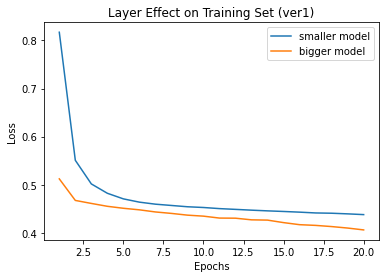

In [10]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_s = history_h1n1_ver1_s.history
history_dict_h1n1_ver1_b = history_h1n1_ver1_b.history

loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["loss"]
loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

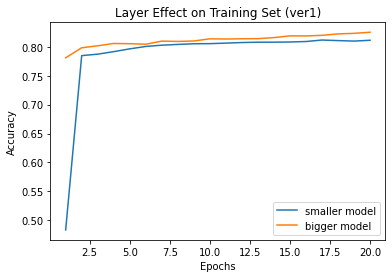

In [11]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["accuracy"]
acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

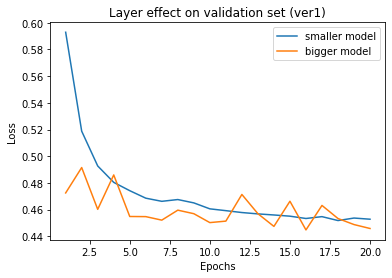

In [12]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_loss"]
val_loss_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

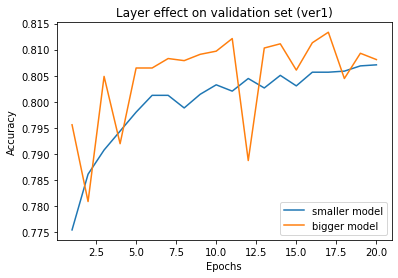

In [13]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_s = history_dict_h1n1_ver1_s["val_accuracy"]
val_acc_values_h1n1_ver1_b = history_dict_h1n1_ver1_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver1_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver1_b, label="bigger model")


plt.title("Layer effect on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 21ms/step - loss: 1.9095 - accuracy: 0.7714 - val_loss: 1.4325 - val_accuracy: 0.7906
Epoch 2/20
39/39 [==============================] - 1s 23ms/step - loss: 1.0939 - accuracy: 0.7935 - val_loss: 0.8369 - val_accuracy: 0.7924
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 0.6717 - accuracy: 0.8001 - val_loss: 0.5710 - val_accuracy: 0.8057
Epoch 4/20
39/39 [==============================] - 1s 23ms/step - loss: 0.5438 - accuracy: 0.7991 - val_loss: 0.5256 - val_accuracy: 0.7976
Epoch 5/20
39/39 [==============================] - 1s 21ms/step - loss: 0.5071 - accuracy: 0.8025 - val_loss: 0.5095 - val_accuracy: 0.7972
Epoch 6/20
39/39 [==============================] - 1s 20ms/step - loss: 0.4903 - accuracy: 0.8044 - val_loss: 0.4918 - val_accuracy: 0.8029
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4801 - accuracy: 0.8070 - val_loss: 0.5187 - val_accuracy: 0.7900
Epoch 8/20
39

**layer 8개 + L1 regularization 2개**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 35ms/step - loss: 2.0384 - accuracy: 0.7736 - val_loss: 1.5167 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 1.1786 - accuracy: 0.7921 - val_loss: 0.9032 - val_accuracy: 0.7952
Epoch 3/20
39/39 [==============================] - 1s 16ms/step - loss: 0.7284 - accuracy: 0.7983 - val_loss: 0.6193 - val_accuracy: 0.8025
Epoch 4/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5805 - accuracy: 0.8026 - val_loss: 0.5542 - val_accuracy: 0.8031
Epoch 5/20
39/39 [==============================] - 1s 22ms/step - loss: 0.5339 - accuracy: 0.8021 - val_loss: 0.5322 - val_accuracy: 0.8075
Epoch 6/20
39/39 [==============================] - 1s 17ms/step - loss: 0.5075 - accuracy: 0.8052 - val_loss: 0.5109 - val_accuracy: 0.8019
Epoch 7/20
39/39 [==============================] - 1s 21ms/step - loss: 0.4914 - accuracy: 0.8086 - val_loss: 0.4985 - val_accuracy: 0.8045
Epoch 8/20
39

**layer 8개 + L2 regularization 1개**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 26ms/step - loss: 0.6263 - accuracy: 0.7718 - val_loss: 0.5835 - val_accuracy: 0.7712
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 0.5230 - accuracy: 0.7928 - val_loss: 0.5053 - val_accuracy: 0.8017
Epoch 3/20
39/39 [==============================] - 1s 21ms/step - loss: 0.4892 - accuracy: 0.8018 - val_loss: 0.4841 - val_accuracy: 0.8037
Epoch 4/20
39/39 [==============================] - 1s 18ms/step - loss: 0.4740 - accuracy: 0.8057 - val_loss: 0.4733 - val_accuracy: 0.8059
Epoch 5/20
39/39 [==============================] - 1s 19ms/step - loss: 0.4669 - accuracy: 0.8045 - val_loss: 0.4699 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 1s 19ms/step - loss: 0.4609 - accuracy: 0.8047 - val_loss: 0.4816 - val_accuracy: 0.7966
Epoch 7/20
39/39 [==============================] - 1s 25ms/step - loss: 0.4543 - accuracy: 0.8072 - val_loss: 0.4641 - val_accuracy: 0.8057
Epoch 8/20
39

**layer 8개 + L2 regularization 2개**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 19ms/step - loss: 0.6816 - accuracy: 0.7688 - val_loss: 0.5858 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 14ms/step - loss: 0.5466 - accuracy: 0.7943 - val_loss: 0.5246 - val_accuracy: 0.8017
Epoch 3/20
39/39 [==============================] - 1s 13ms/step - loss: 0.5040 - accuracy: 0.8025 - val_loss: 0.5059 - val_accuracy: 0.7976
Epoch 4/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4859 - accuracy: 0.8018 - val_loss: 0.4985 - val_accuracy: 0.7998
Epoch 5/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4718 - accuracy: 0.8033 - val_loss: 0.4854 - val_accuracy: 0.8057
Epoch 6/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4640 - accuracy: 0.8059 - val_loss: 0.4899 - val_accuracy: 0.7835
Epoch 7/20
39/39 [==============================] - 1s 14ms/step - loss: 0.4571 - accuracy: 0.8079 - val_loss: 0.4758 - val_accuracy: 0.8053
Epoch 8/20
39

**layer 8개 + L1&L2 regularization 1개**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 31ms/step - loss: 2.1569 - accuracy: 0.7671 - val_loss: 1.6189 - val_accuracy: 0.7932
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 1.2238 - accuracy: 0.7956 - val_loss: 0.9189 - val_accuracy: 0.7942
Epoch 3/20
39/39 [==============================] - 1s 21ms/step - loss: 0.7436 - accuracy: 0.7992 - val_loss: 0.6347 - val_accuracy: 0.8002
Epoch 4/20
39/39 [==============================] - 1s 21ms/step - loss: 0.5896 - accuracy: 0.8019 - val_loss: 0.5639 - val_accuracy: 0.8041
Epoch 5/20
39/39 [==============================] - 1s 20ms/step - loss: 0.5385 - accuracy: 0.8044 - val_loss: 0.5284 - val_accuracy: 0.8059
Epoch 6/20
39/39 [==============================] - 1s 21ms/step - loss: 0.5135 - accuracy: 0.8061 - val_loss: 0.5154 - val_accuracy: 0.7988
Epoch 7/20
39/39 [==============================] - 1s 20ms/step - loss: 0.4969 - accuracy: 0.8062 - val_loss: 0.5151 - val_accuracy: 0.8091
Epoch 8/20
39

### visualize

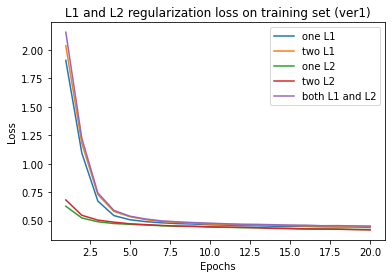

In [20]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 regularization loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

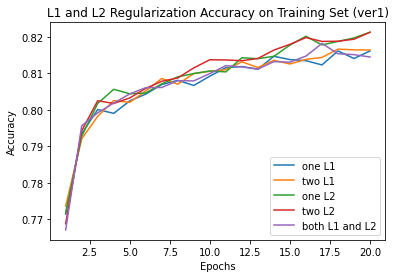

In [22]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

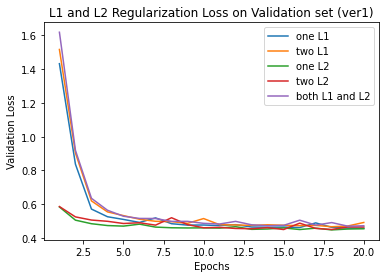

In [23]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

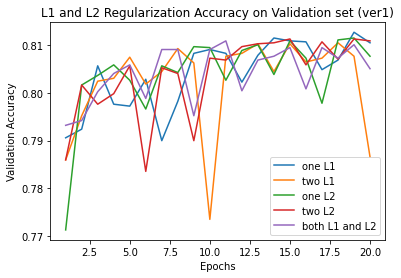

In [26]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 21ms/step - loss: 1.1159 - accuracy: 0.7880 - val_loss: 0.8916 - val_accuracy: 0.7870
Epoch 2/20
39/39 [==============================] - 1s 16ms/step - loss: 0.7307 - accuracy: 0.7916 - val_loss: 0.6533 - val_accuracy: 0.8017
Epoch 3/20
39/39 [==============================] - 1s 18ms/step - loss: 0.5706 - accuracy: 0.8006 - val_loss: 0.5512 - val_accuracy: 0.7886
Epoch 4/20
39/39 [==============================] - 1s 23ms/step - loss: 0.5109 - accuracy: 0.7970 - val_loss: 0.5205 - val_accuracy: 0.7946
Epoch 5/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4871 - accuracy: 0.8049 - val_loss: 0.4835 - val_accuracy: 0.8065
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 0.4706 - accuracy: 0.8072 - val_loss: 0.4799 - val_accuracy: 0.8067
Epoch 7/20
39/39 [==============================] - 1s 22ms/step - loss: 0.4642 - accuracy: 0.8055 - val_loss: 0.4699 - val_accuracy: 0.8067
Epoch 8/20
39

**0.002**

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 34ms/step - loss: 0.7700 - accuracy: 0.7737 - val_loss: 0.6487 - val_accuracy: 0.7954
Epoch 2/20
39/39 [==============================] - 1s 18ms/step - loss: 0.6032 - accuracy: 0.7946 - val_loss: 0.5550 - val_accuracy: 0.8043
Epoch 3/20
39/39 [==============================] - 1s 16ms/step - loss: 0.5301 - accuracy: 0.7997 - val_loss: 0.5140 - val_accuracy: 0.8012
Epoch 4/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4992 - accuracy: 0.8017 - val_loss: 0.4920 - val_accuracy: 0.8021
Epoch 5/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4822 - accuracy: 0.8031 - val_loss: 0.4813 - val_accuracy: 0.8071
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.4694 - accuracy: 0.8054 - val_loss: 0.5075 - val_accuracy: 0.7710
Epoch 7/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4603 - accuracy: 0.8074 - val_loss: 0.4677 - val_accuracy: 0.8053
Epoch 8/20
39

**0.001(original)**

In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 25ms/step - loss: 0.7143 - accuracy: 0.6982 - val_loss: 0.5913 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 0.5428 - accuracy: 0.7897 - val_loss: 0.5177 - val_accuracy: 0.7986
Epoch 3/20
39/39 [==============================] - 1s 21ms/step - loss: 0.5034 - accuracy: 0.7987 - val_loss: 0.5140 - val_accuracy: 0.7932
Epoch 4/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4839 - accuracy: 0.8008 - val_loss: 0.4825 - val_accuracy: 0.8031
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.4724 - accuracy: 0.8051 - val_loss: 0.4847 - val_accuracy: 0.8023
Epoch 6/20
39/39 [==============================] - 1s 31ms/step - loss: 0.4632 - accuracy: 0.8073 - val_loss: 0.4688 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 34ms/step - loss: 0.4590 - accuracy: 0.8055 - val_loss: 0.4643 - val_accuracy: 0.8067
Epoch 8/20
39

**0.0005**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 41ms/step - loss: 0.5835 - accuracy: 0.7760 - val_loss: 0.5566 - val_accuracy: 0.7964
Epoch 2/20
39/39 [==============================] - 1s 28ms/step - loss: 0.5143 - accuracy: 0.7942 - val_loss: 0.5333 - val_accuracy: 0.7894
Epoch 3/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4906 - accuracy: 0.7973 - val_loss: 0.4935 - val_accuracy: 0.7952
Epoch 4/20
39/39 [==============================] - 1s 37ms/step - loss: 0.4768 - accuracy: 0.8036 - val_loss: 0.4811 - val_accuracy: 0.7934
Epoch 5/20
39/39 [==============================] - 1s 35ms/step - loss: 0.4677 - accuracy: 0.8042 - val_loss: 0.4763 - val_accuracy: 0.7986
Epoch 6/20
39/39 [==============================] - 1s 32ms/step - loss: 0.4609 - accuracy: 0.8055 - val_loss: 0.4683 - val_accuracy: 0.8051
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 0.4558 - accuracy: 0.8084 - val_loss: 0.4670 - val_accuracy: 0.8067
Epoch 8/20
39

**0.0001**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 6s 46ms/step - loss: 0.5182 - accuracy: 0.7880 - val_loss: 0.5020 - val_accuracy: 0.7666
Epoch 2/20
39/39 [==============================] - 1s 33ms/step - loss: 0.4808 - accuracy: 0.7965 - val_loss: 0.4762 - val_accuracy: 0.7966
Epoch 3/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4716 - accuracy: 0.7997 - val_loss: 0.4687 - val_accuracy: 0.8067
Epoch 4/20
39/39 [==============================] - 1s 21ms/step - loss: 0.4607 - accuracy: 0.8054 - val_loss: 0.4833 - val_accuracy: 0.7777
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.4566 - accuracy: 0.8060 - val_loss: 0.4767 - val_accuracy: 0.7916
Epoch 6/20
39/39 [==============================] - 1s 25ms/step - loss: 0.4518 - accuracy: 0.8088 - val_loss: 0.4689 - val_accuracy: 0.7926
Epoch 7/20
39/39 [==============================] - 1s 24ms/step - loss: 0.4452 - accuracy: 0.8089 - val_loss: 0.4641 - val_accuracy: 0.7974
Epoch 8/20
39

### visualize

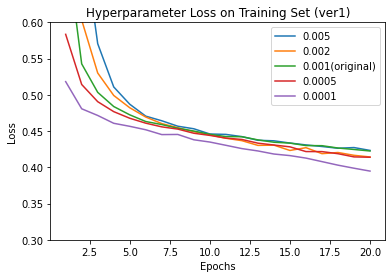

In [32]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

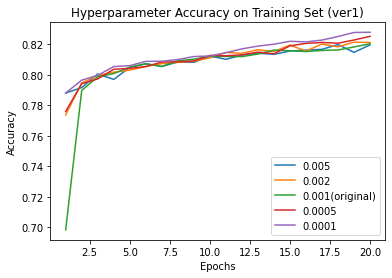

In [33]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

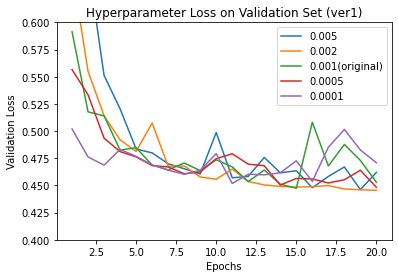

In [34]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

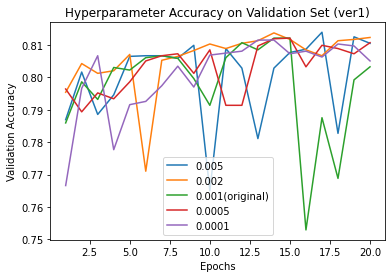

In [35]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 34ms/step - loss: 0.6467 - accuracy: 0.7812 - val_loss: 0.5802 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 31ms/step - loss: 0.5498 - accuracy: 0.7893 - val_loss: 0.5225 - val_accuracy: 0.8000
Epoch 3/20
39/39 [==============================] - 1s 28ms/step - loss: 0.5120 - accuracy: 0.7970 - val_loss: 0.5198 - val_accuracy: 0.8021
Epoch 4/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4931 - accuracy: 0.8024 - val_loss: 0.4923 - val_accuracy: 0.8051
Epoch 5/20
39/39 [==============================] - 1s 29ms/step - loss: 0.4807 - accuracy: 0.8016 - val_loss: 0.4918 - val_accuracy: 0.8037
Epoch 6/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4697 - accuracy: 0.8062 - val_loss: 0.4757 - val_accuracy: 0.8008
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 0.4632 - accuracy: 0.8080 - val_loss: 0.4712 - val_accuracy: 0.8061
Epoch 8/20
39

**# dropout = 2**

In [37]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 34ms/step - loss: 0.6669 - accuracy: 0.7778 - val_loss: 0.5776 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 34ms/step - loss: 0.5621 - accuracy: 0.7859 - val_loss: 0.5304 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 1s 31ms/step - loss: 0.5248 - accuracy: 0.7860 - val_loss: 0.5060 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 1s 32ms/step - loss: 0.5011 - accuracy: 0.7927 - val_loss: 0.5384 - val_accuracy: 0.7829
Epoch 5/20
39/39 [==============================] - 1s 30ms/step - loss: 0.4870 - accuracy: 0.7982 - val_loss: 0.4897 - val_accuracy: 0.7992
Epoch 6/20
39/39 [==============================] - 1s 31ms/step - loss: 0.4746 - accuracy: 0.8037 - val_loss: 0.4726 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 1s 32ms/step - loss: 0.4692 - accuracy: 0.8050 - val_loss: 0.4878 - val_accuracy: 0.7934
Epoch 8/20
39

**# dropout = 3**

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 44ms/step - loss: 0.7640 - accuracy: 0.6967 - val_loss: 0.5838 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 28ms/step - loss: 0.6144 - accuracy: 0.7827 - val_loss: 0.5386 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.5612 - accuracy: 0.7857 - val_loss: 0.5081 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 1s 38ms/step - loss: 0.5208 - accuracy: 0.7887 - val_loss: 0.4991 - val_accuracy: 0.7876
Epoch 5/20
39/39 [==============================] - 1s 33ms/step - loss: 0.5018 - accuracy: 0.7914 - val_loss: 0.4848 - val_accuracy: 0.7954
Epoch 6/20
39/39 [==============================] - 1s 36ms/step - loss: 0.4869 - accuracy: 0.7972 - val_loss: 0.4749 - val_accuracy: 0.8067
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.4779 - accuracy: 0.7976 - val_loss: 0.4680 - val_accuracy: 0.8041
Epoch 8/20
39

### visualize

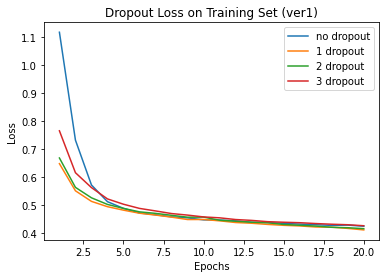

In [39]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

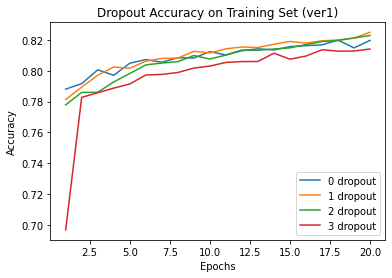

In [40]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

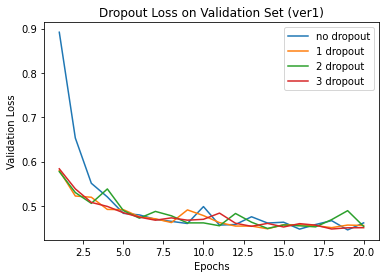

In [41]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

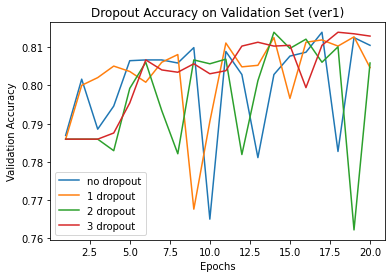

In [42]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# h1n1 model.ver2

In [43]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [44]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [46]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### layer effect

**layer 3개**

In [47]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_s = keras.Sequential([
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_s.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_s = model_h1n1_ver2_s.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 2s 12ms/step - loss: 0.7486 - accuracy: 0.5519 - val_loss: 0.5133 - val_accuracy: 0.7870
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.7871 - val_loss: 0.4399 - val_accuracy: 0.7950
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.3986 - accuracy: 0.8192 - val_loss: 0.3612 - val_accuracy: 0.8564
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8729 - val_loss: 0.2790 - val_accuracy: 0.9035
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.9204 - val_loss: 0.1980 - val_accuracy: 0.9404
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1626 - accuracy: 0.9635 - val_loss: 0.1330 - val_accuracy: 0.9738
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.1018 - accuracy: 0.9916 - val_loss: 0.0776 - val_accuracy: 0.9980
Epoch 8/20
39/39 [=

**layer 8개**
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_b = keras.Sequential([
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(256, activation = "relu"),
                                      layers.Dense(128, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(64, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(16, activation = "relu"),
                                      layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_b.compile(optimizer = "rmsprop",
                          loss = "binary_crossentropy",
                          metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_b = model_h1n1_ver2_b.fit(x_train_h1n1_ver2,
                                            y_train_h1n1_ver2,
                                            epochs = 20,
                                            batch_size = 512,
                                            validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 32ms/step - loss: 0.3986 - accuracy: 0.8254 - val_loss: 0.0882 - val_accuracy: 0.9901
Epoch 2/20
39/39 [==============================] - 1s 23ms/step - loss: 0.1570 - accuracy: 0.9726 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 6.9667e-04 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 1.4963e-04 - accuracy: 1.0000 - val_loss: 1.0411e-04 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 22ms/step - loss: 7.3808e-06 - accuracy: 1.0000 - val_loss: 1.1071e-05 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 23ms/step - loss: 7.5305e-07 - accuracy: 1.0000 - val_loss: 3.8965e-06 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 33ms/step - loss: 9.8141e-08 - accuracy: 1.0000 - val_loss: 3.7597e-07 

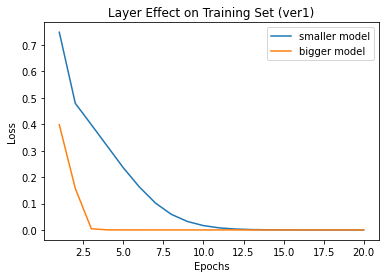

In [49]:
# Layer effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_s = history_h1n1_ver2_s.history
history_dict_h1n1_ver2_b = history_h1n1_ver2_b.history

loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["loss"]
loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

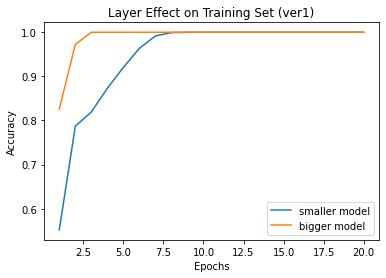

In [50]:
# Layer effect on training accuracy


import matplotlib.pyplot as plt



acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["accuracy"]
acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

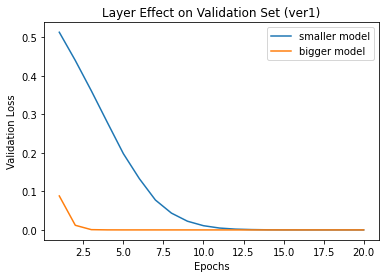

In [51]:
# Layer effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_loss"]
val_loss_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_loss"]

epochs = range(1, len(val_loss_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_loss_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

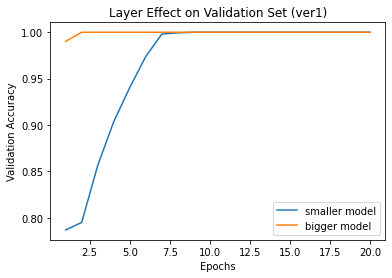

In [52]:
# Layer effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_s = history_dict_h1n1_ver2_s["val_accuracy"]
val_acc_values_h1n1_ver2_b = history_dict_h1n1_ver2_b["val_accuracy"]

epochs = range(1, len(val_acc_values_h1n1_ver2_s) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_s, label="smaller model")
plt.plot(epochs, val_acc_values_h1n1_ver2_b, label="bigger model")


plt.title("Layer Effect on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 32ms/step - loss: 1.8270 - accuracy: 0.8204 - val_loss: 1.2074 - val_accuracy: 0.9950
Epoch 2/20
39/39 [==============================] - 1s 21ms/step - loss: 0.9259 - accuracy: 0.9402 - val_loss: 0.5492 - val_accuracy: 0.9998
Epoch 3/20
39/39 [==============================] - 1s 23ms/step - loss: 0.5251 - accuracy: 0.9938 - val_loss: 0.2522 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 23ms/step - loss: 0.2102 - accuracy: 1.0000 - val_loss: 0.1678 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.2971 - accuracy: 0.9867 - val_loss: 0.1206 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 29ms/step - loss: 0.1064 - accuracy: 1.0000 - val_loss: 0.0928 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 37ms/step - loss: 0.3027 - accuracy: 0.9544 - val_loss: 0.0869 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L1 regularization 2개**

In [55]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 5s 32ms/step - loss: 1.9067 - accuracy: 0.8381 - val_loss: 1.2156 - val_accuracy: 0.9909
Epoch 2/20
39/39 [==============================] - 1s 25ms/step - loss: 0.9381 - accuracy: 0.9656 - val_loss: 0.6062 - val_accuracy: 0.9990
Epoch 3/20
39/39 [==============================] - 1s 25ms/step - loss: 0.4409 - accuracy: 1.0000 - val_loss: 0.2987 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 29ms/step - loss: 0.3522 - accuracy: 0.9787 - val_loss: 0.2167 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1899 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 32ms/step - loss: 0.1801 - accuracy: 0.9952 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 28ms/step - loss: 0.2425 - accuracy: 0.9672 - val_loss: 0.1033 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L2 regularization 1개**

In [56]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 34ms/step - loss: 0.4864 - accuracy: 0.8543 - val_loss: 0.9166 - val_accuracy: 0.7863
Epoch 2/20
39/39 [==============================] - 1s 21ms/step - loss: 0.1222 - accuracy: 0.9941 - val_loss: 0.0629 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 21ms/step - loss: 0.1258 - accuracy: 0.9943 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0811 - accuracy: 0.9942 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 22ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 23ms/step - loss: 0.1222 - accuracy: 0.9879 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L2 regularization 2개**

In [57]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 30ms/step - loss: 0.5334 - accuracy: 0.8281 - val_loss: 0.2585 - val_accuracy: 0.9885
Epoch 2/20
39/39 [==============================] - 1s 24ms/step - loss: 0.1468 - accuracy: 0.9862 - val_loss: 0.0736 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 25ms/step - loss: 0.2165 - accuracy: 0.9698 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0446 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 22ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0982 - accuracy: 0.9944 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 8/20
39

**layer 8개 + L1&L2 regularization 1개**

In [58]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 34ms/step - loss: 2.0412 - accuracy: 0.8251 - val_loss: 1.3400 - val_accuracy: 0.9128
Epoch 2/20
39/39 [==============================] - 1s 27ms/step - loss: 1.0481 - accuracy: 0.9448 - val_loss: 0.6705 - val_accuracy: 0.9984
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 0.5644 - accuracy: 0.9770 - val_loss: 0.3639 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 26ms/step - loss: 0.3033 - accuracy: 1.0000 - val_loss: 0.2360 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 23ms/step - loss: 0.3187 - accuracy: 0.9821 - val_loss: 0.1889 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 21ms/step - loss: 0.1694 - accuracy: 1.0000 - val_loss: 0.1436 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 23ms/step - loss: 0.3063 - accuracy: 0.9563 - val_loss: 0.1305 - val_accuracy: 1.0000
Epoch 8/20
39

### visualize

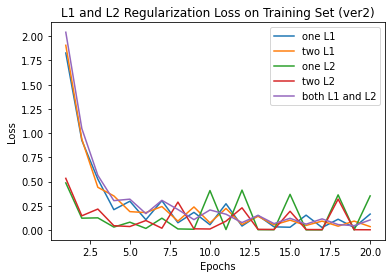

In [59]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

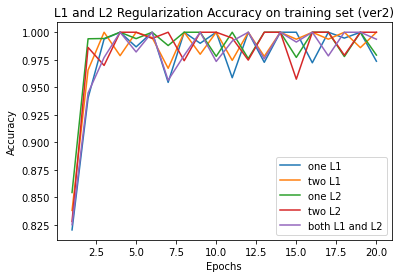

In [60]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2")

plt.title("L1 and L2 Regularization Accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

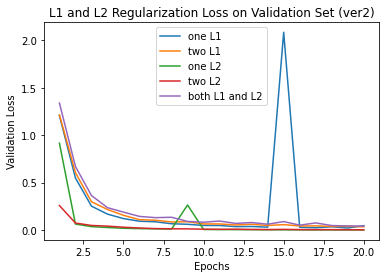

In [61]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

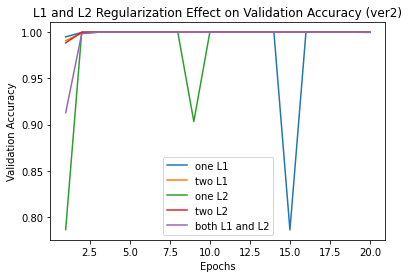

In [62]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Effect on Validation Accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [63]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 6s 52ms/step - loss: 0.9695 - accuracy: 0.8555 - val_loss: 0.4749 - val_accuracy: 0.9988
Epoch 2/20
39/39 [==============================] - 1s 32ms/step - loss: 0.4355 - accuracy: 0.9778 - val_loss: 0.2746 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 2s 40ms/step - loss: 0.2009 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 35ms/step - loss: 0.3706 - accuracy: 0.9587 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 36ms/step - loss: 0.0705 - accuracy: 0.9996 - val_loss: 2.9874 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 1s 34ms/step - loss: 0.1271 - accuracy: 0.9943 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 37ms/step - loss: 0.1043 - accuracy: 0.9943 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 8/20
39

**0.002**

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver2,
                                                y_train_h1n1_ver2,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 40ms/step - loss: 0.6456 - accuracy: 0.8441 - val_loss: 0.3101 - val_accuracy: 0.9899
Epoch 2/20
39/39 [==============================] - 1s 21ms/step - loss: 0.2325 - accuracy: 0.9756 - val_loss: 0.1257 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 37ms/step - loss: 0.2101 - accuracy: 0.9810 - val_loss: 0.0659 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1106 - accuracy: 0.9940 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0247 - accuracy: 0.9999 - val_loss: 2.9519 - val_accuracy: 0.7859
Epoch 8/20
39

**0.001(original)**

In [65]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver2,
                                                     y_train_h1n1_ver2,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 36ms/step - loss: 0.5580 - accuracy: 0.8168 - val_loss: 0.2558 - val_accuracy: 0.9394
Epoch 2/20
39/39 [==============================] - 1s 27ms/step - loss: 0.1721 - accuracy: 0.9744 - val_loss: 0.0749 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 0.3319 - accuracy: 0.9645 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 35ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 32ms/step - loss: 0.2631 - accuracy: 0.9717 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 8/20
39

**0.0005**

In [66]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 5s 46ms/step - loss: 0.4152 - accuracy: 0.8687 - val_loss: 0.1217 - val_accuracy: 0.9805
Epoch 2/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0882 - accuracy: 0.9927 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 35ms/step - loss: 0.2300 - accuracy: 0.9742 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 36ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 25ms/step - loss: 0.1431 - accuracy: 0.9790 - val_loss: 0.8896 - val_accuracy: 0.7884
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 0.0412 - accuracy: 0.9929 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 8/20
39

**0.0001**

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver2,
                                                  y_train_h1n1_ver2,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 6s 40ms/step - loss: 0.4476 - accuracy: 0.8027 - val_loss: 0.5104 - val_accuracy: 0.7898
Epoch 2/20
39/39 [==============================] - 2s 41ms/step - loss: 0.0903 - accuracy: 0.9775 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1942 - accuracy: 0.9710 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 25ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 20ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 8/20
39

### visualize

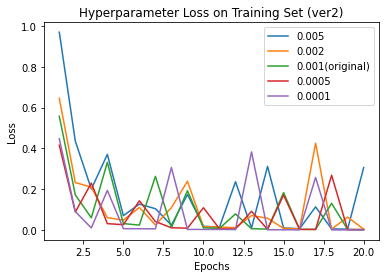

In [68]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

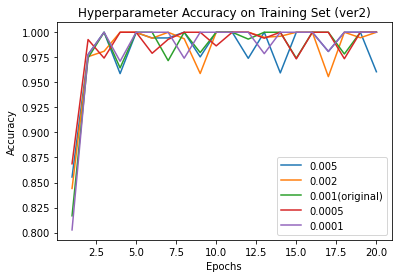

In [69]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

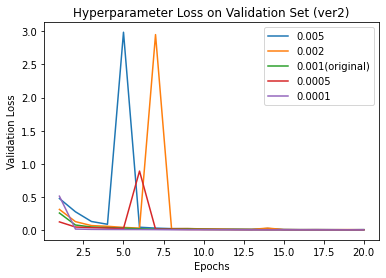

In [70]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

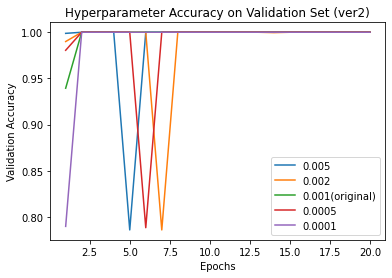

In [71]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 5s 42ms/step - loss: 0.5410 - accuracy: 0.8252 - val_loss: 0.2085 - val_accuracy: 0.9903
Epoch 2/20
39/39 [==============================] - 1s 28ms/step - loss: 0.1325 - accuracy: 0.9897 - val_loss: 0.6790 - val_accuracy: 0.8359
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.2357 - accuracy: 0.9757 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 28ms/step - loss: 0.0652 - accuracy: 0.9975 - val_loss: 8.6615 - val_accuracy: 0.2141
Epoch 5/20
39/39 [==============================] - 1s 30ms/step - loss: 0.2687 - accuracy: 0.9798 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 31ms/step - loss: 0.0401 - accuracy: 0.9999 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 32ms/step - loss: 0.1163 - accuracy: 0.9856 - val_loss: 0.0285 - val_accuracy: 1.0000
Epoch 8/20
39

**# dropout = 2**

In [73]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver2,
                                                    y_train_h1n1_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 4s 33ms/step - loss: 0.5284 - accuracy: 0.7927 - val_loss: 0.2950 - val_accuracy: 0.9976
Epoch 2/20
39/39 [==============================] - 1s 22ms/step - loss: 0.2602 - accuracy: 0.9607 - val_loss: 0.0999 - val_accuracy: 1.0000
Epoch 3/20
39/39 [==============================] - 1s 27ms/step - loss: 0.0837 - accuracy: 0.9996 - val_loss: 0.0632 - val_accuracy: 1.0000
Epoch 4/20
39/39 [==============================] - 1s 26ms/step - loss: 0.0544 - accuracy: 0.9998 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 28ms/step - loss: 0.1468 - accuracy: 0.9931 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 30ms/step - loss: 0.0905 - accuracy: 0.9950 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 8/20
39

**# dropout = 3**

In [74]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_threedr = model_h1n1_ver2_threedr.fit(x_train_h1n1_ver2,
                                                        y_train_h1n1_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver2, y_valid_h1n1_ver2))


Epoch 1/20
39/39 [==============================] - 3s 26ms/step - loss: 0.5901 - accuracy: 0.7839 - val_loss: 0.3127 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 1s 20ms/step - loss: 0.2814 - accuracy: 0.8990 - val_loss: 0.2168 - val_accuracy: 0.9962
Epoch 3/20
39/39 [==============================] - 1s 23ms/step - loss: 0.2256 - accuracy: 0.9708 - val_loss: 0.1810 - val_accuracy: 0.9998
Epoch 4/20
39/39 [==============================] - 1s 24ms/step - loss: 0.2165 - accuracy: 0.9658 - val_loss: 0.0707 - val_accuracy: 1.0000
Epoch 5/20
39/39 [==============================] - 1s 24ms/step - loss: 0.0833 - accuracy: 0.9959 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 0.1480 - accuracy: 0.9778 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 7/20
39/39 [==============================] - 1s 21ms/step - loss: 0.0471 - accuracy: 0.9988 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 8/20
39

### visualize

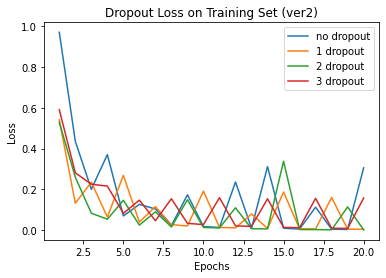

In [75]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_threedr = history_h1n1_ver2_threedr.history


loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

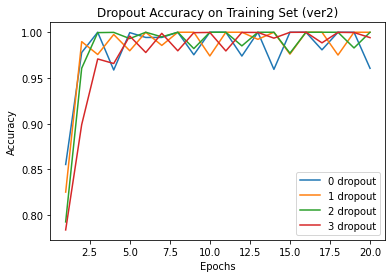

In [76]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

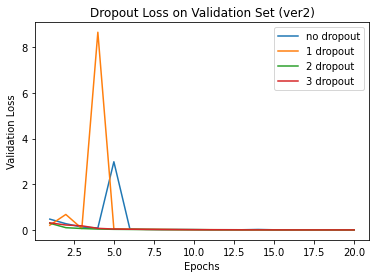

In [77]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

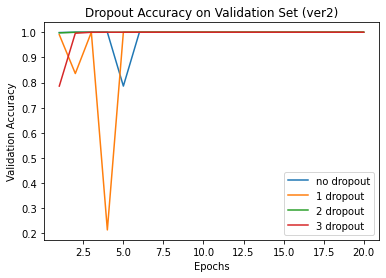

In [78]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_threedr, label="3 dropout")


plt.title("Dropout Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Seasonal Model.ver1

In [111]:
train_seasonal_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver1.csv')

In [112]:
print(train_seasonal_ver1.shape)
train_seasonal_ver1.head()

(25026, 22)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2.0,4.0,2,1,2,1,2,0.0,0.0,1
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,1,1,2,9,2,2.0,0.0,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,4.0,1.0,5,1,1,5,3,0.0,0.0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3,1,1,9,2,1.0,0.0,0


In [113]:
train_seasonal_ver1.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'race',
       'sex', 'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'seasonal_vaccine'],
      dtype='object')

In [114]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver1.iloc[:,1:-1]
target = train_seasonal_ver1['seasonal_vaccine']

x_train_seasonal_ver1, x_valid_seasonal_ver1, y_train_seasonal_ver1, y_valid_seasonal_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### layer effect

**layer 3개**

In [115]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_s = model_seasonal_ver1_s.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 1s 7ms/step - loss: 0.6938 - accuracy: 0.5498 - val_loss: 0.6442 - val_accuracy: 0.6512
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6756 - val_loss: 0.6006 - val_accuracy: 0.6944
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5839 - accuracy: 0.7088 - val_loss: 0.5788 - val_accuracy: 0.7107
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.7190 - val_loss: 0.5684 - val_accuracy: 0.7159
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7264 - val_loss: 0.5621 - val_accuracy: 0.7211
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7318 - val_loss: 0.5715 - val_accuracy: 0.7139
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7317 - val_loss: 0.5627 - val_accuracy: 0.7205
Epoch 8/20
40/40 [==

**layer 8개**


In [116]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_b = model_seasonal_ver1_b.fit(x_train_seasonal_ver1,
                                                    y_train_seasonal_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 20ms/step - loss: 0.6312 - accuracy: 0.6357 - val_loss: 0.5786 - val_accuracy: 0.7062
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.5587 - accuracy: 0.7217 - val_loss: 0.6353 - val_accuracy: 0.6784
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5493 - accuracy: 0.7298 - val_loss: 0.5941 - val_accuracy: 0.6946
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5434 - accuracy: 0.7341 - val_loss: 0.5877 - val_accuracy: 0.6844
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5412 - accuracy: 0.7309 - val_loss: 0.5857 - val_accuracy: 0.6930
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5369 - accuracy: 0.7352 - val_loss: 0.5609 - val_accuracy: 0.7283
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5328 - accuracy: 0.7410 - val_loss: 0.5706 - val_accuracy: 0.7084
Epoch 8/20
40

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [117]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_1 = model_seasonal_ver1_L1_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 4s 25ms/step - loss: 1.9906 - accuracy: 0.6555 - val_loss: 1.4880 - val_accuracy: 0.7093
Epoch 2/20
40/40 [==============================] - 1s 19ms/step - loss: 1.1777 - accuracy: 0.7156 - val_loss: 0.9117 - val_accuracy: 0.7211
Epoch 3/20
40/40 [==============================] - 1s 19ms/step - loss: 0.7731 - accuracy: 0.7269 - val_loss: 0.6876 - val_accuracy: 0.7299
Epoch 4/20
40/40 [==============================] - 1s 19ms/step - loss: 0.6474 - accuracy: 0.7307 - val_loss: 0.6519 - val_accuracy: 0.7255
Epoch 5/20
40/40 [==============================] - 1s 23ms/step - loss: 0.6073 - accuracy: 0.7345 - val_loss: 0.6162 - val_accuracy: 0.7193
Epoch 6/20
40/40 [==============================] - 1s 28ms/step - loss: 0.5850 - accuracy: 0.7343 - val_loss: 0.5936 - val_accuracy: 0.7305
Epoch 7/20
40/40 [==============================] - 1s 33ms/step - loss: 0.5723 - accuracy: 0.7402 - val_loss: 0.6075 - val_accuracy: 0.7115
Epoch 8/20
40

**layer 8개 + L1 regularization 2개**

In [118]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L1_2 = model_seasonal_ver1_L1_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 24ms/step - loss: 2.1130 - accuracy: 0.6686 - val_loss: 1.6008 - val_accuracy: 0.6996
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 1.2826 - accuracy: 0.7167 - val_loss: 1.0142 - val_accuracy: 0.7129
Epoch 3/20
40/40 [==============================] - 1s 21ms/step - loss: 0.8543 - accuracy: 0.7256 - val_loss: 0.7709 - val_accuracy: 0.7099
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.7098 - accuracy: 0.7293 - val_loss: 0.7022 - val_accuracy: 0.6966
Epoch 5/20
40/40 [==============================] - 1s 21ms/step - loss: 0.6545 - accuracy: 0.7319 - val_loss: 0.6487 - val_accuracy: 0.7187
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.6237 - accuracy: 0.7345 - val_loss: 0.6417 - val_accuracy: 0.7195
Epoch 7/20
40/40 [==============================] - 1s 23ms/step - loss: 0.6078 - accuracy: 0.7388 - val_loss: 0.6070 - val_accuracy: 0.7347
Epoch 8/20
40

**layer 8개 + L2 regularization 1개**

In [119]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_1 = model_seasonal_ver1_L2_1.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 33ms/step - loss: 0.7194 - accuracy: 0.6722 - val_loss: 0.6646 - val_accuracy: 0.7131
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 0.6144 - accuracy: 0.7188 - val_loss: 0.6591 - val_accuracy: 0.6898
Epoch 3/20
40/40 [==============================] - 1s 22ms/step - loss: 0.5829 - accuracy: 0.7243 - val_loss: 0.6181 - val_accuracy: 0.6876
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.5683 - accuracy: 0.7285 - val_loss: 0.6684 - val_accuracy: 0.6740
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.5636 - accuracy: 0.7322 - val_loss: 0.5911 - val_accuracy: 0.7038
Epoch 6/20
40/40 [==============================] - 1s 21ms/step - loss: 0.5508 - accuracy: 0.7356 - val_loss: 0.5642 - val_accuracy: 0.7313
Epoch 7/20
40/40 [==============================] - 1s 24ms/step - loss: 0.5448 - accuracy: 0.7397 - val_loss: 0.5628 - val_accuracy: 0.7161
Epoch 8/20
40

**layer 8개 + L2 regularization 2개**

In [120]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L2_2 = model_seasonal_ver1_L2_2.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 34ms/step - loss: 0.7411 - accuracy: 0.6699 - val_loss: 0.6893 - val_accuracy: 0.7125
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 0.6333 - accuracy: 0.7241 - val_loss: 0.6830 - val_accuracy: 0.6630
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6017 - accuracy: 0.7259 - val_loss: 0.6331 - val_accuracy: 0.6788
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.5810 - accuracy: 0.7289 - val_loss: 0.6124 - val_accuracy: 0.7030
Epoch 5/20
40/40 [==============================] - 1s 22ms/step - loss: 0.5671 - accuracy: 0.7342 - val_loss: 0.5729 - val_accuracy: 0.7285
Epoch 6/20
40/40 [==============================] - 1s 22ms/step - loss: 0.5570 - accuracy: 0.7344 - val_loss: 0.5744 - val_accuracy: 0.7355
Epoch 7/20
40/40 [==============================] - 1s 23ms/step - loss: 0.5500 - accuracy: 0.7407 - val_loss: 0.5672 - val_accuracy: 0.7235
Epoch 8/20
40

**layer 8개 + L1&L2 regularization 1개**

In [121]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_L12 = model_seasonal_ver1_L12.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 5s 49ms/step - loss: 2.2559 - accuracy: 0.6500 - val_loss: 1.7267 - val_accuracy: 0.6630
Epoch 2/20
40/40 [==============================] - 1s 27ms/step - loss: 1.3546 - accuracy: 0.7156 - val_loss: 1.0509 - val_accuracy: 0.7076
Epoch 3/20
40/40 [==============================] - 1s 30ms/step - loss: 0.8736 - accuracy: 0.7233 - val_loss: 0.7629 - val_accuracy: 0.7211
Epoch 4/20
40/40 [==============================] - 1s 36ms/step - loss: 0.7041 - accuracy: 0.7277 - val_loss: 0.7002 - val_accuracy: 0.7195
Epoch 5/20
40/40 [==============================] - 1s 28ms/step - loss: 0.6467 - accuracy: 0.7338 - val_loss: 0.6378 - val_accuracy: 0.7261
Epoch 6/20
40/40 [==============================] - 1s 25ms/step - loss: 0.6121 - accuracy: 0.7360 - val_loss: 0.6358 - val_accuracy: 0.7058
Epoch 7/20
40/40 [==============================] - 1s 22ms/step - loss: 0.5959 - accuracy: 0.7370 - val_loss: 0.6068 - val_accuracy: 0.7201
Epoch 8/20
40

### visualize

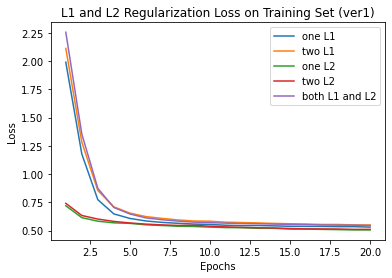

In [122]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_L1_1 = history_seasonal_ver1_L1_1.history
history_dict_seasonal_ver1_L1_2 = history_seasonal_ver1_L1_2.history
history_dict_seasonal_ver1_L2_1 = history_seasonal_ver1_L2_1.history
history_dict_seasonal_ver1_L2_2 = history_seasonal_ver1_L2_2.history
history_dict_seasonal_ver1_L12 = history_seasonal_ver1_L12.history

loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["loss"]
loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["loss"]
loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["loss"]
loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["loss"]
loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

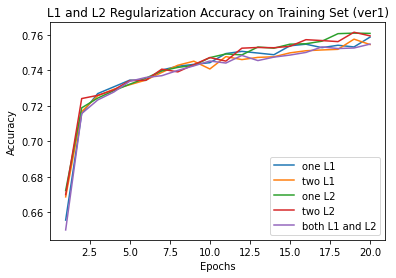

In [123]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["accuracy"]
acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["accuracy"]
acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["accuracy"]
acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["accuracy"]
acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

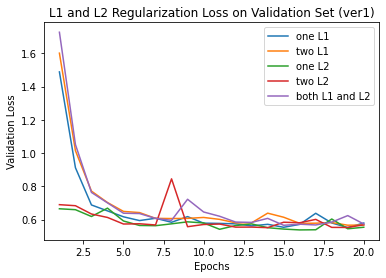

In [124]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_loss"]
val_loss_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_loss"]
val_loss_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_loss"]
val_loss_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_loss"]
val_loss_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

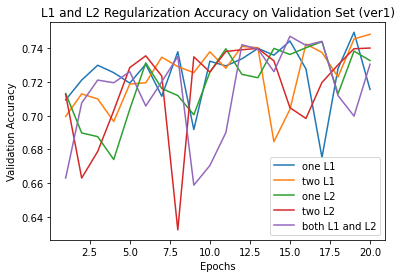

In [125]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_L1_1 = history_dict_seasonal_ver1_L1_1["val_accuracy"]
val_acc_values_seasonal_ver1_L1_2 = history_dict_seasonal_ver1_L1_2["val_accuracy"]
val_acc_values_seasonal_ver1_L2_1 = history_dict_seasonal_ver1_L2_1["val_accuracy"]
val_acc_values_seasonal_ver1_L2_2 = history_dict_seasonal_ver1_L2_2["val_accuracy"]
val_acc_values_seasonal_ver1_L12 = history_dict_seasonal_ver1_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver1_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [129]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_one = model_seasonal_ver1_one.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 31ms/step - loss: 1.2113 - accuracy: 0.6572 - val_loss: 1.0384 - val_accuracy: 0.6157
Epoch 2/20
40/40 [==============================] - 1s 25ms/step - loss: 0.8170 - accuracy: 0.7151 - val_loss: 0.8140 - val_accuracy: 0.6288
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6672 - accuracy: 0.7256 - val_loss: 0.6335 - val_accuracy: 0.7259
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6058 - accuracy: 0.7302 - val_loss: 0.6047 - val_accuracy: 0.7245
Epoch 5/20
40/40 [==============================] - 1s 24ms/step - loss: 0.5801 - accuracy: 0.7330 - val_loss: 0.6062 - val_accuracy: 0.7167
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.5630 - accuracy: 0.7363 - val_loss: 0.5738 - val_accuracy: 0.7297
Epoch 7/20
40/40 [==============================] - 1s 25ms/step - loss: 0.5544 - accuracy: 0.7406 - val_loss: 0.5874 - val_accuracy: 0.7060
Epoch 8/20
40

**0.002**

In [130]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_two = model_seasonal_ver1_two.fit(x_train_seasonal_ver1,
                                                        y_train_seasonal_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 3s 30ms/step - loss: 0.8687 - accuracy: 0.6647 - val_loss: 0.9096 - val_accuracy: 0.6400
Epoch 2/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6982 - accuracy: 0.7180 - val_loss: 0.6614 - val_accuracy: 0.7064
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.6284 - accuracy: 0.7276 - val_loss: 0.6417 - val_accuracy: 0.7050
Epoch 4/20
40/40 [==============================] - 1s 25ms/step - loss: 0.5936 - accuracy: 0.7314 - val_loss: 0.6528 - val_accuracy: 0.6554
Epoch 5/20
40/40 [==============================] - 1s 25ms/step - loss: 0.5752 - accuracy: 0.7357 - val_loss: 0.5814 - val_accuracy: 0.7337
Epoch 6/20
40/40 [==============================] - 1s 37ms/step - loss: 0.5647 - accuracy: 0.7350 - val_loss: 0.5884 - val_accuracy: 0.7123
Epoch 7/20
40/40 [==============================] - 1s 33ms/step - loss: 0.5567 - accuracy: 0.7374 - val_loss: 0.5753 - val_accuracy: 0.7341
Epoch 8/20
40

**0.001(original)**

In [131]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_three = model_seasonal_ver1_three.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 23ms/step - loss: 0.7501 - accuracy: 0.6570 - val_loss: 0.6794 - val_accuracy: 0.6896
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.6328 - accuracy: 0.7226 - val_loss: 0.6194 - val_accuracy: 0.7109
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5970 - accuracy: 0.7256 - val_loss: 0.6007 - val_accuracy: 0.7235
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5806 - accuracy: 0.7289 - val_loss: 0.5821 - val_accuracy: 0.7321
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5653 - accuracy: 0.7362 - val_loss: 0.5888 - val_accuracy: 0.7283
Epoch 6/20
40/40 [==============================] - 1s 19ms/step - loss: 0.5575 - accuracy: 0.7369 - val_loss: 0.5630 - val_accuracy: 0.7337
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5496 - accuracy: 0.7386 - val_loss: 0.5653 - val_accuracy: 0.7333
Epoch 8/20
40

**0.0005**

In [132]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_four = model_seasonal_ver1_four.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.6953 - accuracy: 0.6453 - val_loss: 0.6269 - val_accuracy: 0.7139
Epoch 2/20
40/40 [==============================] - 1s 17ms/step - loss: 0.6058 - accuracy: 0.7170 - val_loss: 0.6063 - val_accuracy: 0.7078
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5824 - accuracy: 0.7229 - val_loss: 0.6214 - val_accuracy: 0.6874
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5688 - accuracy: 0.7285 - val_loss: 0.6269 - val_accuracy: 0.6918
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5603 - accuracy: 0.7331 - val_loss: 0.5976 - val_accuracy: 0.6988
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5538 - accuracy: 0.7372 - val_loss: 0.5846 - val_accuracy: 0.6884
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5479 - accuracy: 0.7377 - val_loss: 0.5634 - val_accuracy: 0.7331
Epoch 8/20
40

**0.0001**

In [133]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_five = model_seasonal_ver1_five.fit(x_train_seasonal_ver1,
                                                          y_train_seasonal_ver1,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 2s 22ms/step - loss: 0.6258 - accuracy: 0.6738 - val_loss: 0.5978 - val_accuracy: 0.7012
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5728 - accuracy: 0.7190 - val_loss: 0.5715 - val_accuracy: 0.7251
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5587 - accuracy: 0.7257 - val_loss: 0.5771 - val_accuracy: 0.7205
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5549 - accuracy: 0.7308 - val_loss: 0.5649 - val_accuracy: 0.7223
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.5473 - accuracy: 0.7372 - val_loss: 0.5891 - val_accuracy: 0.6890
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5437 - accuracy: 0.7397 - val_loss: 0.6045 - val_accuracy: 0.6960
Epoch 7/20
40/40 [==============================] - 1s 17ms/step - loss: 0.5423 - accuracy: 0.7384 - val_loss: 0.5518 - val_accuracy: 0.7309
Epoch 8/20
40

### visualize

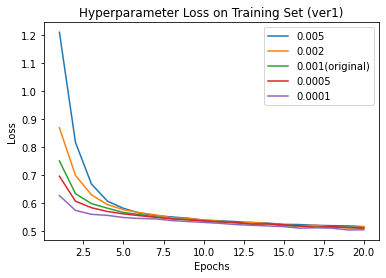

In [134]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver1_one = history_seasonal_ver1_one.history
history_dict_seasonal_ver1_two = history_seasonal_ver1_two.history
history_dict_seasonal_ver1_three = history_seasonal_ver1_three.history
history_dict_seasonal_ver1_four = history_seasonal_ver1_four.history
history_dict_seasonal_ver1_five = history_seasonal_ver1_five.history

loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["loss"]
loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["loss"]
loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["loss"]
loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["loss"]
loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

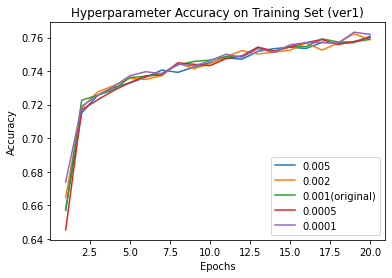

In [135]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["accuracy"]
acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["accuracy"]
acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["accuracy"]
acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["accuracy"]
acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

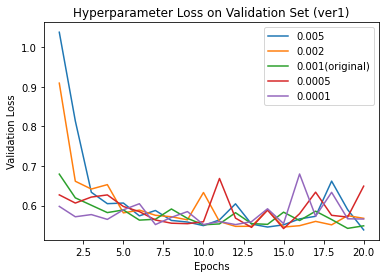

In [136]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_loss"]
val_loss_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_loss"]
val_loss_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_loss"]
val_loss_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_loss"]
val_loss_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

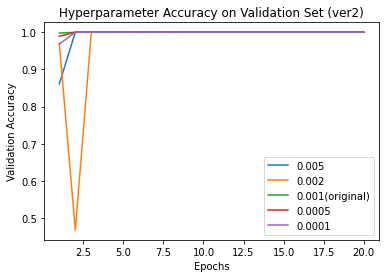

In [137]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_one = history_dict_seasonal_ver1_one["val_accuracy"]
val_acc_values_seasonal_ver1_two = history_dict_seasonal_ver1_two["val_accuracy"]
val_acc_values_seasonal_ver1_three = history_dict_seasonal_ver1_three["val_accuracy"]
val_acc_values_seasonal_ver1_four = history_dict_seasonal_ver1_four["val_accuracy"]
val_acc_values_seasonal_ver1_five = history_dict_seasonal_ver1_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver1_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver1_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [138]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_onedr = model_seasonal_ver1_onedr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 6s 35ms/step - loss: 0.7443 - accuracy: 0.6687 - val_loss: 0.7721 - val_accuracy: 0.6514
Epoch 2/20
40/40 [==============================] - 1s 34ms/step - loss: 0.6439 - accuracy: 0.7219 - val_loss: 0.6204 - val_accuracy: 0.7137
Epoch 3/20
40/40 [==============================] - 1s 34ms/step - loss: 0.6019 - accuracy: 0.7301 - val_loss: 0.6110 - val_accuracy: 0.7171
Epoch 4/20
40/40 [==============================] - 1s 23ms/step - loss: 0.5825 - accuracy: 0.7339 - val_loss: 0.5874 - val_accuracy: 0.7245
Epoch 5/20
40/40 [==============================] - 1s 26ms/step - loss: 0.5717 - accuracy: 0.7339 - val_loss: 0.5723 - val_accuracy: 0.7311
Epoch 6/20
40/40 [==============================] - 1s 33ms/step - loss: 0.5602 - accuracy: 0.7406 - val_loss: 0.5644 - val_accuracy: 0.7335
Epoch 7/20
40/40 [==============================] - 1s 34ms/step - loss: 0.5530 - accuracy: 0.7401 - val_loss: 0.5621 - val_accuracy: 0.7329
Epoch 8/20
40

**# dropout = 2**

In [139]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_twodr = model_seasonal_ver1_twodr.fit(x_train_seasonal_ver1,
                                                            y_train_seasonal_ver1,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 4s 41ms/step - loss: 0.7745 - accuracy: 0.6499 - val_loss: 0.7218 - val_accuracy: 0.6704
Epoch 2/20
40/40 [==============================] - 1s 35ms/step - loss: 0.6653 - accuracy: 0.7166 - val_loss: 0.6306 - val_accuracy: 0.7201
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.6211 - accuracy: 0.7268 - val_loss: 0.6004 - val_accuracy: 0.7267
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.6002 - accuracy: 0.7289 - val_loss: 0.5990 - val_accuracy: 0.7283
Epoch 5/20
40/40 [==============================] - 1s 29ms/step - loss: 0.5844 - accuracy: 0.7320 - val_loss: 0.5976 - val_accuracy: 0.7111
Epoch 6/20
40/40 [==============================] - 1s 29ms/step - loss: 0.5737 - accuracy: 0.7372 - val_loss: 0.5819 - val_accuracy: 0.7271
Epoch 7/20
40/40 [==============================] - 1s 27ms/step - loss: 0.5638 - accuracy: 0.7386 - val_loss: 0.5838 - val_accuracy: 0.7419
Epoch 8/20
40

**# dropout = 3**

In [140]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver1_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver1_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver1_threedr = model_seasonal_ver1_threedr.fit(x_train_seasonal_ver1,
                                                                y_train_seasonal_ver1,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver1, y_valid_seasonal_ver1))


Epoch 1/20
40/40 [==============================] - 5s 53ms/step - loss: 0.7927 - accuracy: 0.6129 - val_loss: 0.7104 - val_accuracy: 0.7002
Epoch 2/20
40/40 [==============================] - 1s 24ms/step - loss: 0.6841 - accuracy: 0.6966 - val_loss: 0.6324 - val_accuracy: 0.7167
Epoch 3/20
40/40 [==============================] - 1s 33ms/step - loss: 0.6411 - accuracy: 0.7169 - val_loss: 0.6288 - val_accuracy: 0.7229
Epoch 4/20
40/40 [==============================] - 1s 35ms/step - loss: 0.6149 - accuracy: 0.7218 - val_loss: 0.6134 - val_accuracy: 0.7105
Epoch 5/20
40/40 [==============================] - 1s 35ms/step - loss: 0.6031 - accuracy: 0.7272 - val_loss: 0.6033 - val_accuracy: 0.7297
Epoch 6/20
40/40 [==============================] - 1s 34ms/step - loss: 0.5857 - accuracy: 0.7354 - val_loss: 0.5789 - val_accuracy: 0.7285
Epoch 7/20
40/40 [==============================] - 1s 29ms/step - loss: 0.5773 - accuracy: 0.7367 - val_loss: 0.5819 - val_accuracy: 0.7243
Epoch 8/20
40

### visualize

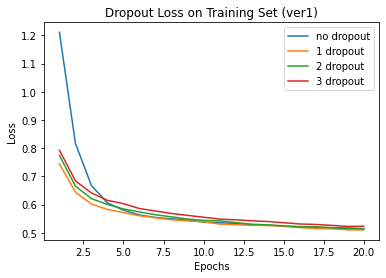

In [141]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver1_onedr = history_seasonal_ver1_onedr.history
history_dict_seasonal_ver1_twodr = history_seasonal_ver1_twodr.history
history_dict_seasonal_ver1_threedr = history_seasonal_ver1_threedr.history


loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["loss"]
loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["loss"]
loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

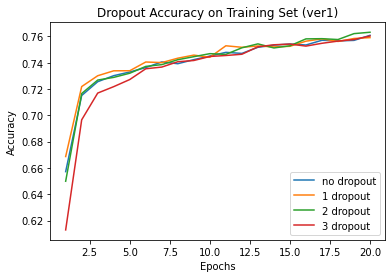

In [142]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["accuracy"]
acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["accuracy"]
acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

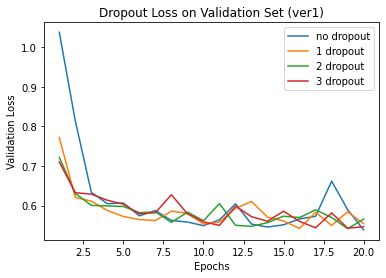

In [143]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_loss"]
val_loss_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_loss"]
val_loss_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

In [145]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver1_onedr = history_dict_seasonal_ver1_onedr["val_accuracy"]
val_acc_values_seasonal_ver1_twodr = history_dict_seasonal_ver1_twodr["val_accuracy"]
val_acc_values_seasonal_ver1_threedr = history_dict_seasonal_ver1_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver1_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

NameError: ignored

# Seasonal Model.ver2

In [79]:
train_seasonal_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_seasonal_ver2.csv')

In [80]:
print(train_seasonal_ver2.shape)
train_seasonal_ver2.head()

(25026, 36)


,respondent_id,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


In [81]:
train_seasonal_ver2.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'seasonal_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [82]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_seasonal_ver2.iloc[:,1:-1]
target = train_seasonal_ver2['seasonal_vaccine']

x_train_seasonal_ver2, x_valid_seasonal_ver2, y_train_seasonal_ver2, y_valid_seasonal_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                                              stratify=target,  random_state=1234) 

### layer effect

**layer 3개**

In [83]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_s = keras.Sequential([
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_s.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_s = model_seasonal_ver2_s.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 13ms/step - loss: 0.5619 - accuracy: 0.7867 - val_loss: 0.4794 - val_accuracy: 0.8370
Epoch 2/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8671 - val_loss: 0.3566 - val_accuracy: 0.8807
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.2965 - accuracy: 0.9108 - val_loss: 0.2405 - val_accuracy: 0.9405
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.9639 - val_loss: 0.1392 - val_accuracy: 0.9862
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.1030 - accuracy: 0.9939 - val_loss: 0.0763 - val_accuracy: 0.9978
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9999 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 8/20
40/40 [=

**layer 8개**


In [84]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_b = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_b.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_b = model_seasonal_ver2_b.fit(x_train_seasonal_ver2,
                                                    y_train_seasonal_ver2,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 3s 21ms/step - loss: 0.4331 - accuracy: 0.8030 - val_loss: 0.0716 - val_accuracy: 0.9884
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.0893 - accuracy: 0.9711 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 5.5785e-04 - accuracy: 1.0000 - val_loss: 7.6181e-05 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 2.3776e-05 - accuracy: 1.0000 - val_loss: 5.3759e-06 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 1.8438e-06 - accuracy: 1.0000 - val_loss: 1.0058e-06 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 1.9970e-07 - accuracy: 1.0000 - val_loss: 8.4434e-08 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 3.0534e-08 - accuracy: 1.0000 - val_loss: 1.9707e

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [85]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_1.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_1 = model_seasonal_ver2_L1_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 3s 30ms/step - loss: 1.8751 - accuracy: 0.7939 - val_loss: 1.1141 - val_accuracy: 0.9948
Epoch 2/20
40/40 [==============================] - 1s 21ms/step - loss: 0.7886 - accuracy: 0.9995 - val_loss: 0.4904 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 22ms/step - loss: 0.5282 - accuracy: 0.9719 - val_loss: 0.2048 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 21ms/step - loss: 0.1676 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 21ms/step - loss: 0.1128 - accuracy: 1.0000 - val_loss: 2.7608 - val_accuracy: 0.5334
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.2740 - accuracy: 0.9743 - val_loss: 0.0733 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 24ms/step - loss: 0.2381 - accuracy: 0.9731 - val_loss: 0.0852 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L1 regularization 2개**

In [86]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L1_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L1_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L1_2 = model_seasonal_ver2_L1_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 1.9466 - accuracy: 0.7910 - val_loss: 1.1537 - val_accuracy: 0.9946
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.8134 - accuracy: 0.9990 - val_loss: 0.5082 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 0.5614 - accuracy: 0.9659 - val_loss: 0.3030 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2602 - accuracy: 1.0000 - val_loss: 0.2068 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2946 - accuracy: 0.9838 - val_loss: 0.1498 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1337 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2547 - accuracy: 0.9711 - val_loss: 0.1002 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L2 regularization 1개**

In [87]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_1 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_1 = model_seasonal_ver2_L2_1.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 5s 31ms/step - loss: 0.6148 - accuracy: 0.7745 - val_loss: 0.2055 - val_accuracy: 0.9856
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 0.1870 - accuracy: 0.9809 - val_loss: 0.0665 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 24ms/step - loss: 0.1551 - accuracy: 0.9854 - val_loss: 0.3109 - val_accuracy: 0.8883
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0290 - accuracy: 0.9976 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1646 - accuracy: 0.9885 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L2 regularization 2개**

In [88]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L2_2 = keras.Sequential([
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(256, activation = "relu"),
                                             layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(64, activation = "relu"),
                                             layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                             layers.Dense(16, activation = "relu"),
                                             layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L2_2.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L2_2 = model_seasonal_ver2_L2_2.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 3s 29ms/step - loss: 0.6315 - accuracy: 0.7713 - val_loss: 0.2145 - val_accuracy: 0.9860
Epoch 2/20
40/40 [==============================] - 1s 21ms/step - loss: 0.1844 - accuracy: 0.9720 - val_loss: 0.0777 - val_accuracy: 0.9996
Epoch 3/20
40/40 [==============================] - 1s 25ms/step - loss: 0.0629 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2039 - accuracy: 0.9871 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 32ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 23ms/step - loss: 0.2371 - accuracy: 0.9711 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 21ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 8/20
40

**layer 8개 + L1&L2 regularization 1개**

In [89]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_L12 = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_L12.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_L12 = model_seasonal_ver2_L12.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 4s 42ms/step - loss: 2.0987 - accuracy: 0.7746 - val_loss: 1.4149 - val_accuracy: 0.8831
Epoch 2/20
40/40 [==============================] - 1s 28ms/step - loss: 0.9924 - accuracy: 0.9690 - val_loss: 0.6136 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 29ms/step - loss: 0.4805 - accuracy: 1.0000 - val_loss: 0.3593 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 28ms/step - loss: 0.3978 - accuracy: 0.9805 - val_loss: 0.2380 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 30ms/step - loss: 0.2103 - accuracy: 1.0000 - val_loss: 0.1747 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 25ms/step - loss: 0.2927 - accuracy: 0.9720 - val_loss: 0.1409 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 21ms/step - loss: 0.1292 - accuracy: 1.0000 - val_loss: 0.1133 - val_accuracy: 1.0000
Epoch 8/20
40

### visualize

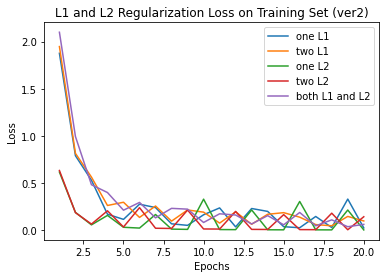

In [90]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_L1_1 = history_seasonal_ver2_L1_1.history
history_dict_seasonal_ver2_L1_2 = history_seasonal_ver2_L1_2.history
history_dict_seasonal_ver2_L2_1 = history_seasonal_ver2_L2_1.history
history_dict_seasonal_ver2_L2_2 = history_seasonal_ver2_L2_2.history
history_dict_seasonal_ver2_L12 = history_seasonal_ver2_L12.history

loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["loss"]
loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["loss"]
loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["loss"]
loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["loss"]
loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

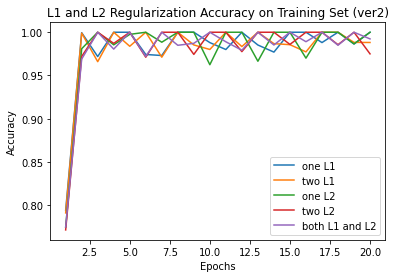

In [91]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["accuracy"]
acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["accuracy"]
acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["accuracy"]
acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["accuracy"]
acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

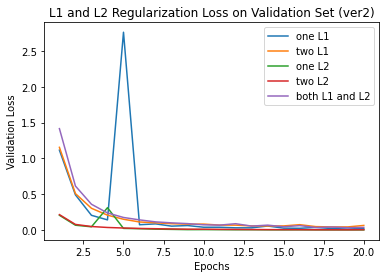

In [92]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_loss"]
val_loss_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_loss"]
val_loss_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_loss"]
val_loss_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_loss"]
val_loss_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_loss_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

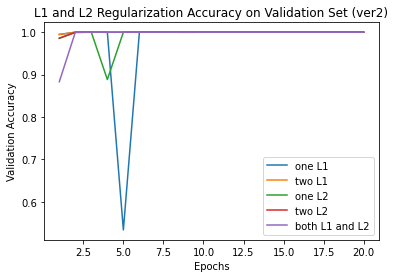

In [93]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_L1_1 = history_dict_seasonal_ver2_L1_1["val_accuracy"]
val_acc_values_seasonal_ver2_L1_2 = history_dict_seasonal_ver2_L1_2["val_accuracy"]
val_acc_values_seasonal_ver2_L2_1 = history_dict_seasonal_ver2_L2_1["val_accuracy"]
val_acc_values_seasonal_ver2_L2_2 = history_dict_seasonal_ver2_L2_2["val_accuracy"]
val_acc_values_seasonal_ver2_L12 = history_dict_seasonal_ver2_L12["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_L1_1, label="one L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L1_2, label="two L1")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_1, label="one L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L2_2, label="two L2")
plt.plot(epochs, val_acc_values_seasonal_ver2_L12, label="both L1 and L2")


plt.title("L1 and L2 Regularization Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.3,0.9])
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [94]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_one = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_one.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_one = model_seasonal_ver2_one.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 1.0796 - accuracy: 0.7767 - val_loss: 0.7395 - val_accuracy: 0.8612
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.3679 - accuracy: 0.9954 - val_loss: 0.2354 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 0.3686 - accuracy: 0.9713 - val_loss: 0.1665 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1413 - accuracy: 1.0000 - val_loss: 0.1080 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2772 - accuracy: 0.9798 - val_loss: 0.0734 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0680 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1600 - accuracy: 0.9863 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 8/20
40

**0.002**

In [95]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_two = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_two.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_two = model_seasonal_ver2_two.fit(x_train_seasonal_ver2,
                                                        y_train_seasonal_ver2,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.8503 - accuracy: 0.7114 - val_loss: 0.3980 - val_accuracy: 0.9702
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2648 - accuracy: 0.9754 - val_loss: 4.8671 - val_accuracy: 0.4680
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 0.2634 - accuracy: 0.9840 - val_loss: 0.1101 - val_accuracy: 0.9998
Epoch 4/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1997 - accuracy: 0.9880 - val_loss: 0.0722 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0628 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2441 - accuracy: 0.9748 - val_loss: 0.0380 - val_accuracy: 0.9996
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.0332 - val_accuracy: 1.0000
Epoch 8/20
40

**0.001(original)**

In [96]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_three = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_three.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_three = model_seasonal_ver2_three.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.5391 - accuracy: 0.8143 - val_loss: 0.1461 - val_accuracy: 0.9978
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1878 - accuracy: 0.9808 - val_loss: 0.0850 - val_accuracy: 0.9998
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0691 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2336 - accuracy: 0.9657 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.2057 - accuracy: 0.9875 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 8/20
40

**0.0005**

In [97]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_four = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_four.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_four = model_seasonal_ver2_four.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 4s 42ms/step - loss: 0.5024 - accuracy: 0.7953 - val_loss: 0.1285 - val_accuracy: 0.9892
Epoch 2/20
40/40 [==============================] - 1s 29ms/step - loss: 0.1305 - accuracy: 0.9712 - val_loss: 0.0460 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 29ms/step - loss: 0.2269 - accuracy: 0.9881 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 31ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 28ms/step - loss: 0.2487 - accuracy: 0.9753 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 8/20
40

**0.0001**

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_five = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_five.compile(optimizer = "rmsprop",
                                 loss = "binary_crossentropy",
                                 metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_five = model_seasonal_ver2_five.fit(x_train_seasonal_ver2,
                                                          y_train_seasonal_ver2,
                                                          epochs = 20,
                                                          batch_size = 512,
                                                          validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.4015 - accuracy: 0.8333 - val_loss: 0.1126 - val_accuracy: 0.9682
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1056 - accuracy: 0.9754 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 16ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 21ms/step - loss: 0.2983 - accuracy: 0.9652 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 8/20
40

### visualize

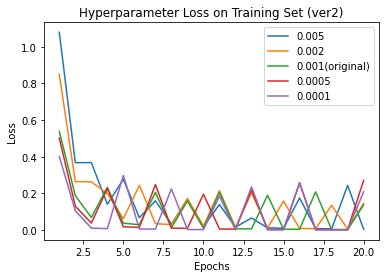

In [99]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_seasonal_ver2_one = history_seasonal_ver2_one.history
history_dict_seasonal_ver2_two = history_seasonal_ver2_two.history
history_dict_seasonal_ver2_three = history_seasonal_ver2_three.history
history_dict_seasonal_ver2_four = history_seasonal_ver2_four.history
history_dict_seasonal_ver2_five = history_seasonal_ver2_five.history

loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["loss"]
loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["loss"]
loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["loss"]
loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["loss"]
loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["loss"]


epochs = range(1, len(loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.3,0.6])
plt.legend()
plt.show()

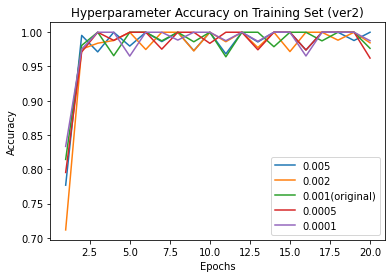

In [100]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["accuracy"]
acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["accuracy"]
acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["accuracy"]
acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["accuracy"]
acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["accuracy"]


epochs = range(1, len(acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.7, 0.85])
plt.legend()
plt.show()

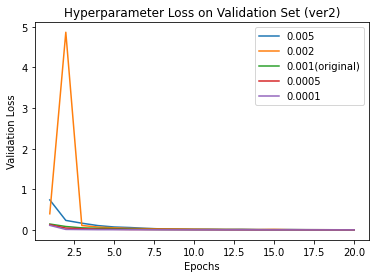

In [101]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_loss"]
val_loss_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_loss"]
val_loss_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_loss"]
val_loss_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_loss"]
val_loss_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

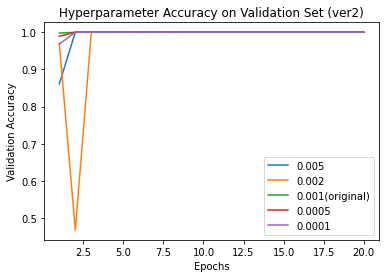

In [102]:
# Hyperparameter effect on validation accuracy

import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_one = history_dict_seasonal_ver2_one["val_accuracy"]
val_acc_values_seasonal_ver2_two = history_dict_seasonal_ver2_two["val_accuracy"]
val_acc_values_seasonal_ver2_three = history_dict_seasonal_ver2_three["val_accuracy"]
val_acc_values_seasonal_ver2_four = history_dict_seasonal_ver2_four["val_accuracy"]
val_acc_values_seasonal_ver2_five = history_dict_seasonal_ver2_five["val_accuracy"]


epochs = range(1, len(val_acc_values_seasonal_ver2_one) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_seasonal_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_seasonal_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_seasonal_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_seasonal_ver2_five, label="0.0001")


plt.title("Hyperparameter Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [103]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_onedr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_onedr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_onedr = model_seasonal_ver2_onedr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.5492 - accuracy: 0.8061 - val_loss: 0.3595 - val_accuracy: 0.8883
Epoch 2/20
40/40 [==============================] - 1s 16ms/step - loss: 0.1256 - accuracy: 0.9963 - val_loss: 0.0855 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0708 - accuracy: 1.0000 - val_loss: 0.0514 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 22ms/step - loss: 0.1932 - accuracy: 0.9867 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 23ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 22ms/step - loss: 0.1808 - accuracy: 0.9769 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 8/20
40

**# dropout = 2**

In [104]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_twodr = keras.Sequential([
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(256, activation = "relu"),
                                              layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(64, activation = "relu"),
                                              layers.Dropout(0.5),
                                              layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                              layers.Dense(16, activation = "relu"),
                                              layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_twodr.compile(optimizer = "rmsprop",
                                  loss = "binary_crossentropy",
                                  metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_twodr = model_seasonal_ver2_twodr.fit(x_train_seasonal_ver2,
                                                            y_train_seasonal_ver2,
                                                            epochs = 20,
                                                            batch_size = 512,
                                                            validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 3s 34ms/step - loss: 0.6481 - accuracy: 0.7682 - val_loss: 0.2177 - val_accuracy: 0.9928
Epoch 2/20
40/40 [==============================] - 1s 22ms/step - loss: 0.1690 - accuracy: 0.9828 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 22ms/step - loss: 0.1897 - accuracy: 0.9848 - val_loss: 0.0646 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 22ms/step - loss: 0.0615 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 24ms/step - loss: 0.1609 - accuracy: 0.9863 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 24ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1761 - accuracy: 0.9789 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 8/20
40

**# dropout = 3**

In [105]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_seasonal_ver2_threedr = keras.Sequential([
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(256, activation = "relu"),
                                                layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(64, activation = "relu"),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                                layers.Dropout(0.5),
                                                layers.Dense(16, activation = "relu"),
                                                layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_seasonal_ver2_threedr.compile(optimizer = "rmsprop",
                                    loss = "binary_crossentropy",
                                    metrics = ["accuracy"])



# fitting model

history_seasonal_ver2_threedr = model_seasonal_ver2_threedr.fit(x_train_seasonal_ver2,
                                                                y_train_seasonal_ver2,
                                                                epochs = 20,
                                                                batch_size = 512,
                                                                validation_data = (x_valid_seasonal_ver2, y_valid_seasonal_ver2))


Epoch 1/20
40/40 [==============================] - 4s 39ms/step - loss: 0.7084 - accuracy: 0.7105 - val_loss: 0.2156 - val_accuracy: 0.9980
Epoch 2/20
40/40 [==============================] - 1s 35ms/step - loss: 0.3417 - accuracy: 0.9541 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.1125 - accuracy: 0.9908 - val_loss: 0.0705 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0806 - accuracy: 0.9938 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 5/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2930 - accuracy: 0.9741 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 6/20
40/40 [==============================] - 1s 30ms/step - loss: 0.0507 - accuracy: 0.9966 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0425 - accuracy: 0.9971 - val_loss: 0.0306 - val_accuracy: 1.0000
Epoch 8/20
40

### visualize

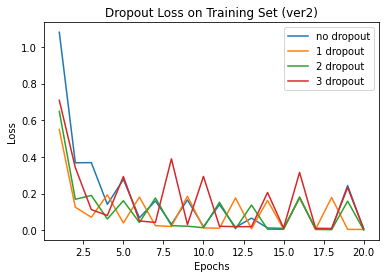

In [109]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_seasonal_ver2_onedr = history_seasonal_ver2_onedr.history
history_dict_seasonal_ver2_twodr = history_seasonal_ver2_twodr.history
history_dict_seasonal_ver2_threedr = history_seasonal_ver2_threedr.history


loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["loss"]
loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["loss"]
loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["loss"]

epochs = range(1, len(loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

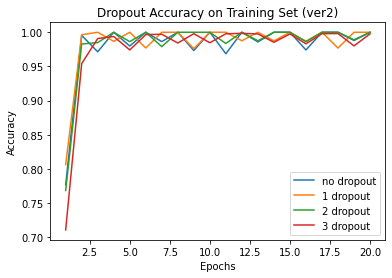

In [110]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["accuracy"]
acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["accuracy"]
acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Training Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

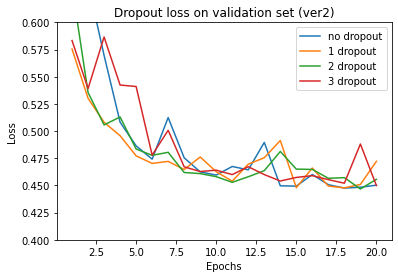

In [ ]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt



val_loss_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_loss"]
val_loss_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_loss"]
val_loss_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_loss"]

epochs = range(1, len(val_loss_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Loss on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

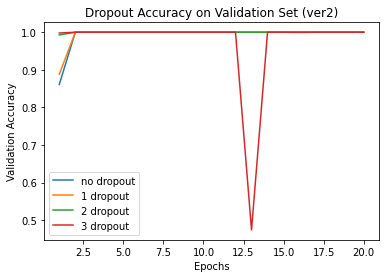

In [108]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_seasonal_ver2_onedr = history_dict_seasonal_ver2_onedr["val_accuracy"]
val_acc_values_seasonal_ver2_twodr = history_dict_seasonal_ver2_twodr["val_accuracy"]
val_acc_values_seasonal_ver2_threedr = history_dict_seasonal_ver2_threedr["val_accuracy"]

epochs = range(1, len(val_acc_values_seasonal_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_seasonal_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_seasonal_ver2_threedr, label="3 dropout")

plt.title("Dropout Accuracy on Validation Set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
#plt.ylim([0.4,0.6])
plt.legend()
plt.show()

# 2) 코드2 ~> 인공신경망 모델

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
training_features_data = pd.read_csv(dpath+"training_set_features.csv")
training_set_labels = pd.read_csv(dpath+"training_set_labels.csv")
test_features_data = pd.read_csv(dpath+"test_set_features.csv")

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
training_features_data=training_features_data.fillna(training_features_data.mean())

# string types -> null값을 'out-of-category'
training_features_data=training_features_data.fillna('out-of-category')

In [ ]:
training_features_data.isna().sum()

In [ ]:
# encoding categorical features (str -> float)

enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [ ]:
# normalization(make all values bet. 0-1)

scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [ ]:
# check if data types are correct or not 

normalized_df.info()

In [ ]:
#check types of test dataset
test_features_data.info()

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
test_features_data=test_features_data.fillna(test_features_data.mean())

## string types -> null값을 'out-of-category'
test_features_data=test_features_data.fillna('out-of-category')

In [ ]:
test_features_data.isna().sum()

In [ ]:
#encoding categorical features  (str -> float)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [ ]:
#check data types
test_encoded_categorical_df.info()

In [ ]:
#normalization(bet. 0-1)

#using minmax scaler(look up)
test_normalized_arr=scaler.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [ ]:
# split df to X and Y
y = training_set_labels.loc[:, 'seasonal_vaccine'].values
X = normalized_df

In [ ]:
# 80: training set, 20: test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# 5 fold CV
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [ ]:
# NN with 1 layer
nn_1 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='relu', max_iter=1000, batch_size=2048)
nn_1.fit(X, y)

# prediction results
y_pred = nn_1.predict(test_normalized_df)

In [ ]:
# NN with 1 layer
nn_2 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='logistic', max_iter=1000, batch_size=512)
nn_2.fit(X, y)

# prediction results
y_pred_2 = nn_2.predict(test_normalized_df)

In [ ]:
np.sum(np.logical_or(np.array(y_pred_2) > 1, np.array(y_pred_2) < 0), axis=0)
y_pred_2 = 1/(1+np.exp(-y_pred_2))

In [ ]:
df_pred_seasonal_vaccine=pd.DataFrame(y_pred_2, columns=['seasonal_vaccine'])
df_pred_seasonal_vaccine["respondent_id"] = df_pred_seasonal_vaccine.index

df_pred_seasonal_vaccine=df_pred_seasonal_vaccine[['respondent_id', 'seasonal_vaccine']]

df_pred_seasonal_vaccine.to_csv('df_seasonal_nn_log.csv', columns=['respondent_id', 'seasonal_vaccine'], 
                            index=False, sep=',')

In [ ]:
df_pred_seasonal_vaccine.head()

In [ ]:
df_pred_h1n1 = pd.read_csv(dpath+"df_h1n1_nn_log_son.csv",
                    sep=',')

df_pred_h1n1.head()

In [ ]:
df_final = df_pred_h1n1.merge(df_pred_seasonal_vaccine, on="respondent_id", how = 'inner')

df_final['respondent_id'] = df_final['respondent_id'].astype(int) + 26707

In [ ]:
df_final.to_csv('df_nn_log.csv', columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' ], 
                            index=False, sep=',')

In [ ]:
df_final.head()

### 예측하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_h1n1 = pd.read_csv(dpath+"test_ver1_h1n1.csv")
test_seasonal = pd.read_csv(dpath+"test_ver1_seasonal.csv")

#### h1n1 예측하기

In [ ]:
## h1n1 인코딩하기

## age_group

test_h1n1.loc[test_h1n1['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_h1n1.loc[test_h1n1['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_h1n1.loc[test_h1n1['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_h1n1.loc[test_h1n1['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_h1n1.loc[test_h1n1['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_h1n1.loc[test_h1n1['race'] == 'White', 'race'] = 1
test_h1n1.loc[test_h1n1['race'] == 'Black', 'race'] = 2
test_h1n1.loc[test_h1n1['race'] == 'Other or Multiple', 'race'] = 3
test_h1n1.loc[test_h1n1['race'] == 'Hispanic', 'race'] = 4


## sex

test_h1n1.loc[test_h1n1['sex'] == 'Female', 'sex'] = 1
test_h1n1.loc[test_h1n1['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_h1n1['hhs_geo_region'])

print(le.classes_)
test_h1n1['hhs_geo_region'] = le.transform(test_h1n1['hhs_geo_region'])


## census_msa

test_h1n1.loc[test_h1n1['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_h1n1['age_group'] = test_h1n1['age_group'].astype(np.int64)
test_h1n1['race'] = test_h1n1['race'].astype(np.int64)
test_h1n1['sex'] = test_h1n1['sex'].astype(np.int64)
test_h1n1['census_msa'] = test_h1n1['census_msa'].astype(np.int64)

In [ ]:
test_h1n1.head()

In [ ]:
test_h1n1 = test_h1n1.drop(['respondent_id'], axis = 1)
test_h1n1.head()

In [ ]:
pred_h1n1 = model_h1n1.predict(test_h1n1)

In [ ]:
pred_h1n1

In [ ]:
test_features['h1n1_vaccine'] = pred_h1n1

#### seasonal 예측하기

In [ ]:
## seasonal 인코딩하기

## age_group

test_seasonal.loc[test_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_seasonal.loc[test_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_seasonal.loc[test_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_seasonal.loc[test_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_seasonal.loc[test_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_seasonal.loc[test_seasonal['race'] == 'White', 'race'] = 1
test_seasonal.loc[test_seasonal['race'] == 'Black', 'race'] = 2
test_seasonal.loc[test_seasonal['race'] == 'Other or Multiple', 'race'] = 3
test_seasonal.loc[test_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

test_seasonal.loc[test_seasonal['sex'] == 'Female', 'sex'] = 1
test_seasonal.loc[test_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_seasonal['hhs_geo_region'])

print(le.classes_)
test_seasonal['hhs_geo_region'] = le.transform(test_seasonal['hhs_geo_region'])


## census_msa

test_seasonal.loc[test_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_seasonal['age_group'] = test_seasonal['age_group'].astype(np.int64)
test_seasonal['race'] = test_seasonal['race'].astype(np.int64)
test_seasonal['sex'] = test_seasonal['sex'].astype(np.int64)
test_seasonal['census_msa'] = test_seasonal['census_msa'].astype(np.int64)

In [ ]:
test_seasonal.info()

In [ ]:
test_seasonal = test_seasonal.drop(['respondent_id'], axis = 1)
test_seasonal.head()

In [ ]:
pred_seasonal = model_seasonal.predict(test_seasonal)

In [ ]:
pred_seasonal

In [ ]:
test_features['seasonal_vaccine'] = pred_seasonal

In [ ]:
test_features.head()

#### 제출 파일 만들기

In [ ]:
submission = test_features[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission.csv' 파일을 다운받으면 됨.

# things to consider

In [ ]:
## [참고]
## 모델 성능을 올리기 위한 방법 중 하나 : 배치 정규화
## 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것
## https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%8B%A0%EA%B2%BD%EB%A7%9D-%ED%95%99%EC%8A%B5%EC%9D%98-%ED%9A%A8%EC%9C%A8%EA%B3%BC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%98%AC%EB%A6%AC%EA%B8%B0

## layers에서 사용할 수 없는 메소드여서 적용은 못 해봤어요 ㅠㅅㅠ


class BatchNormalization :

  def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None) :
    self.gamma = gamma
    self. beta = beta
    self.momentum = momentum
    self.input_shape = None

    # 테스트에서 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var

    # backward시 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

    def forward(self, x, train_flg = True) :
      self.input_shape = x.shape
      if x.ndim != 2 :
        N, C, H, W = x.shape
        x = x.reshape(N, -1)

      out = self.__forward(x, train_flg)

      return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg) :
      if self.running_mean is None :
        N, D = x.shape
        self.running_mean = np.zeros(D)
        self.runnng_var = np.zeros(D)

      if train_flg :
        mu = x.mean(axis = 0)
        xc = x - mu
        var = np.mean(xc * 2, axis = 0)
        std = np.sqrt(var + 10e-7)
        xn = xc / std

        self.batch_size = x.shape[0]
        self.xc = xc
        self.xn = xn
        self.std = std
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
      else :
        xc = x - self.running_mean
        xn = xc / ((np.sqrt(self.running_var + 10e-7)))

      out = self.gamma * xn + self. beta
      return out

    def backward(self, dout) :
      if dout.ndim != 2 :
        N, C, H, W = dout.shape
        dout = dout.reshape(N,-1)

      dx = self.__backward(dout)
      dx = dx.reshape(*self.input_shape)
      return dx

    def __backward(self, dout) :
      dbeta = dout.sum(axis = 0)
      dgamma = np.sum(self.xn * dout, axis = 0)
      dxn = self.gamma * dout
      dxc = dxn / self.std
      dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
      dvar = 0.5 * dstd / self.std
      dxc += (2.0 / self.batch_size) * self.xc * dvar
      dmu = np.sum(dxc, axis = 0)
      dx = dxc - dmu / self. batch_size

      self.dgamma = dgamma
      self.dbeta = dbeta

      return dx


|number|layer|train loss|train accuracy|validation loss|validation accuracy|
|------|-----|----------|--------------|---------------|-------------------|
|1     |layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|2     |layers.Dense(256, activation = "relu"),</br>layers.Dense(128, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|